In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_clean.csv to data_clean (1).csv


In [3]:
data = pd.read_csv("data_clean.csv", index_col=0)

In [4]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [6]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [7]:
# data type conversion

data.Month = pd.to_numeric(data.Month,errors='coerce') #[1,1.5,NAN] january NA
data["Temp C"] = pd.to_numeric(data.Month,errors='coerce') # coerce will introduce NA values for non numeric data in the columns
data.Weather = data.Weather.astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


In [9]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5.0,5,2010,56,S


In [10]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [11]:
# Count duplicated rows
data[data.duplicated()].shape

(1, 9)

In [12]:
# Print duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,9.0,9.0,28,2010,75,S


In [13]:
data_cleaned1 = data.drop_duplicates()

In [14]:
data_cleaned1.shape

(157, 9)

Drop Columns

In [15]:
data_cleaned2 = data_cleaned1.drop('Temp C',axis=1)

In [16]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


Rename the columns

In [17]:
#rename the columns
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [18]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


#Missing Values and Imputation

Double-click (or enter) to edit

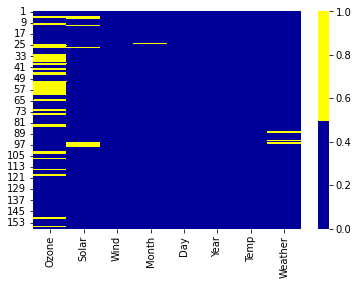

In [19]:
import seaborn as sns
cols = data_cleaned3.columns
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(), cmap=sns.color_palette(colors));

In [20]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [21]:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


In [22]:
#Mean Imputations
mean = data_cleaned3.Ozone.mean()
print(mean)

41.81512605042017


In [23]:
data_cleaned3.Ozone = data_cleaned3.Ozone.fillna(mean)

In [24]:
mean2 = data_cleaned3.Solar.mean()

In [25]:
data_cleaned3.Solar = data_cleaned3.Solar.fillna(mean2)

In [26]:
mode = data_cleaned3.Month.mode().iloc[0]

In [27]:
data_cleaned3.Month = data_cleaned3.Month.fillna(mode)

In [28]:
mode2 = data_cleaned3.Weather.mode().iloc[0]

In [29]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

#Scatter plot and Correlation analysis

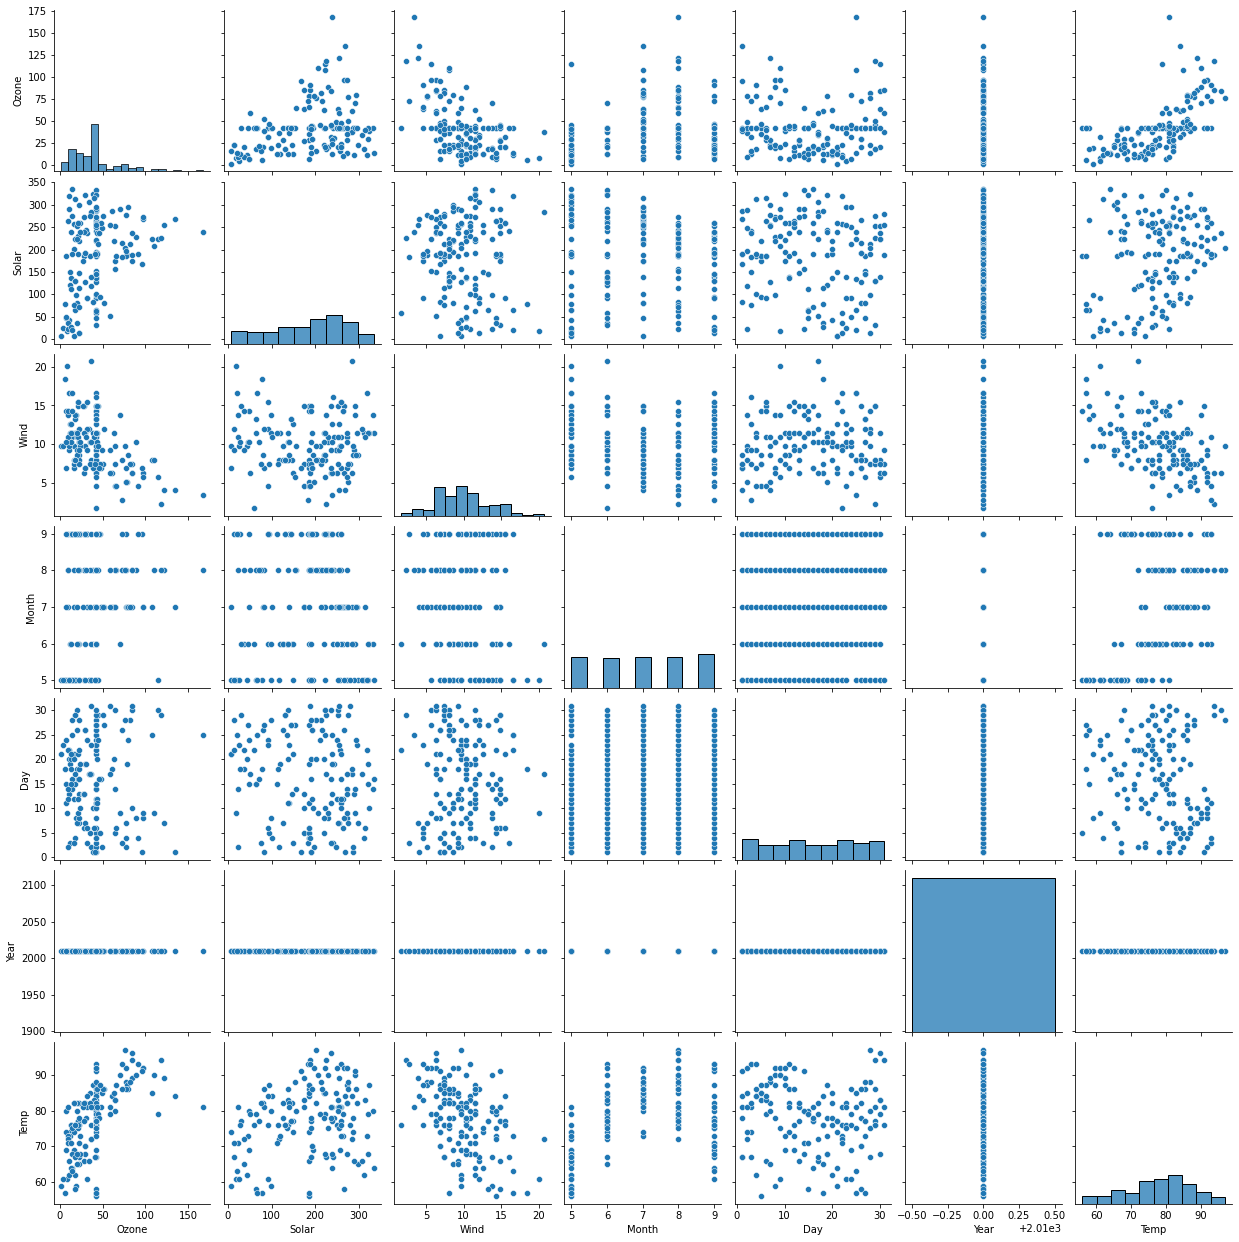

In [30]:
import seaborn as sns
sns.pairplot(data_cleaned3)

In [31]:
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.128969,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.099461,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.159834,0.029900,NaN,-0.441228
Month,0.128969,-0.099461,-0.159834,1.000000,0.057536,NaN,0.376382
Day,-0.021916,-0.151007,0.029900,0.057536,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.376382,-0.122787,NaN,1.000000


#Transformations

Dummy Variables

In [32]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.000000,7.4,5.0,1,2010,67,S
2,36.000000,118.000000,8.0,5.0,2,2010,72,C
3,12.000000,149.000000,12.6,5.0,3,2010,74,PS
4,18.000000,313.000000,11.5,5.0,4,2010,62,S
5,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.000000,11.5,9.0,30,2010,68,S
154,41.000000,190.000000,7.4,5.0,1,2010,67,C
155,30.000000,193.000000,6.9,9.0,26,2010,70,PS
156,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [33]:
data_cleaned4 = pd.get_dummies(data_cleaned3, columns=['Weather'])

In [34]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
2,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
3,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
4,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
5,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
153,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
154,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
155,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
156,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


In [35]:
!pip install pandas-profiling==3.1.0
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas_profiling as pp
import sweetviz as sv

In [37]:
EDA_report = pp.ProfileReport(data)
EDA_report.to_file(output_file='report2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
